In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf 

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
print(tf.keras.__version__)

2.8.0


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image  import ImageDataGenerator, load_img
import numpy as np
from glob import glob 
import matplotlib.pyplot as plt 

In [ ]:
IMAGE_SIZE=[224,224]
train_path='/content/drive/MyDrive/m_images/train'
valid_path='/content/drive/MyDrive/m_images/test'

In [ ]:
vgg19=VGG19(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg19.layers:
  layer.trainable=False 

In [ ]:
folders=glob('/content/drive/MyDrive/m_images/train/*')
folders

['/content/drive/MyDrive/m_images/train/Parasitized',
 '/content/drive/MyDrive/m_images/train/Uninfected']

In [ ]:
x=Flatten()(vgg19.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg19.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2
                                 ,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),batch_size=32,class_mode='categorical')

Found 22057 images belonging to 2 classes.


In [ ]:
test_set=test_datagen.flow_from_directory(valid_path,
                                          target_size=(224,224),batch_size=32,class_mode='categorical')

Found 5515 images belonging to 2 classes.


In [ ]:
test_set.class_indices.keys()

dict_keys(['Parasitized', 'Uninfected'])

In [ ]:
y_test=test_set.labels

In [ ]:
y_test[0:2756].sum()

0

In [ ]:
y_test[2757:].sum()

2758

In [ ]:
r=model.fit(training_set,validation_data=test_set,epochs=15, steps_per_epoch=len(training_set),
            validation_steps=len(test_set))

Epoch 1/15
690/690 [==============================] - 3741s 5s/step - loss: 0.3721 - accuracy: 0.8383 - val_loss: 0.2493 - val_accuracy: 0.9053
Epoch 2/15
690/690 [==============================] - 435s 630ms/step - loss: 0.2767 - accuracy: 0.8919 - val_loss: 0.2378 - val_accuracy: 0.9001
Epoch 3/15
690/690 [==============================] - 443s 642ms/step - loss: 0.2637 - accuracy: 0.8978 - val_loss: 0.3015 - val_accuracy: 0.8854
Epoch 4/15
690/690 [==============================] - 443s 642ms/step - loss: 0.2609 - accuracy: 0.9016 - val_loss: 0.3620 - val_accuracy: 0.8740
Epoch 5/15
690/690 [==============================] - 443s 642ms/step - loss: 0.2608 - accuracy: 0.9052 - val_loss: 0.3016 - val_accuracy: 0.8892
Epoch 6/15
690/690 [==============================] - 439s 636ms/step - loss: 0.2521 - accuracy: 0.9095 - val_loss: 0.1991 - val_accuracy: 0.9242
Epoch 7/15
690/690 [==============================] - 432s 625ms/step - loss: 0.2458 - accuracy: 0.9129 - val_loss: 0.4662 - v

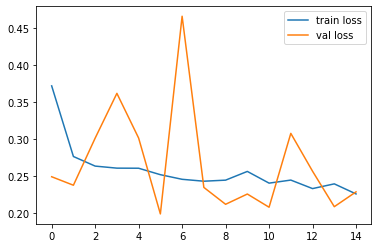

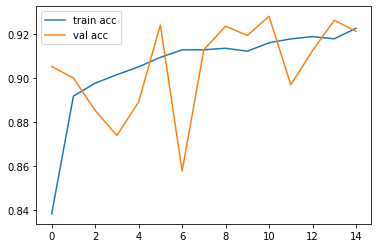

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_test[0:1000].sum()

In [ ]:
y_pred[0:100]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model('model_vgg19.h5')